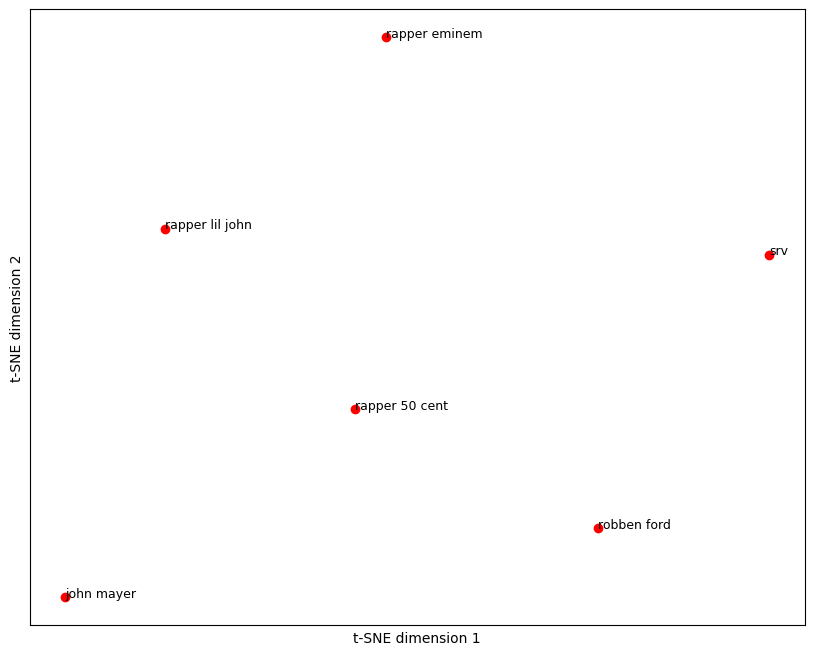

In [5]:
# prerequisites

import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
from llm_utils.client import get_openai_client, OpenAIModels

MODEL = OpenAIModels.EMBED.value

# get the OpenAI client
client = get_openai_client(
    model=MODEL,
    config_path=os.environ.get("CONFIG_PATH")
)

# Define a list of words to visualize
words = ["python", "javascript", "c++", "reptile", "snake"]

# Get embeddings for the words
response = client.embeddings.create(
    input=words,
    model=MODEL
)

embeddings = [emb.embedding for emb in response.data]

# Apply t-SNE dimensionality reduction
tsne = TSNE(
    n_components=2, 
    random_state=42,
    perplexity=4 # see documentation to set this correctly
)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Plot the embeddings in a two-dimensional scatter plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = embeddings_2d[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x, y, word, fontsize=9)

plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.show()
